# **Airline Industry Use Case: Predicting Airfares**

## Overview
This project analyzes flight data to predict airfare prices based on factors like source/destination, flight duration, and stops.

## Objectives
1. **Data Exploration**: Understand dataset structure and key statistics.
2. **Data Cleaning**: Handle missing/inconsistent values for analysis.
3. **Bivariate Analysis**: Identify relationships between variables for prediction.
4. **Preprocessing**: Prepare data (scaling, normalization, transformations).
5. **Feature Encoding**: Convert categorical features to numerical formats.
6. **Handling Outliers**: Detect and manage outliers.
7. **Machine Learning Models**: Implement Decision Trees, Linear Regression, and KNN.
8. **Model Evaluation**: Compare models using metrics like R-squared and MAE.
9. **Visualization & Insights**: Present key findings via visualizations.

This project demonstrates key data science practices, from data cleaning to model evaluation, with a focus on predictive analytics in the airline industry.


## **Importing Necessary Libraries**

In this step, we import the essential Python libraries required for **data loading**, **exploration**, **cleaning**, and **analysis**. These libraries provide powerful tools for efficiently handling data and performing operations like **visualization**, **statistical analysis**, and **predictive modeling**.

### Libraries:
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computations and handling arrays.
- **Matplotlib**: For basic data visualization and plotting graphs.
- **Seaborn**: For advanced statistical data visualization (built on top of Matplotlib).
- **Scikit-learn**: For implementing machine learning algorithms, preprocessing data, and evaluating models.



In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



## **Reading and Uploading the Dataset**

The first step in this project is to load the flight dataset into a **Pandas DataFrame**. The dataset, stored in an **Excel file**, is read into Python using the following code:





In [61]:
train_data = pd.read_excel("/Users/palakgupta/Downloads/Data_Train.xlsx")

## **Data Cleaning and Handling Missing Values**

In this step, we address missing values in the dataset by either **removing** or **imputing** them. The goal is to ensure the data is complete, accurate, and ready for analysis.

- **Removing** rows with missing values may be an option if the data loss is minimal.
- **Imputing** missing values involves filling them with meaningful estimates, such as the mean, median, or a predicted value, based on the context of the data.

<span style="color:red; font-size: 16px;">Note</span>: Proper handling of missing values is crucial to maintaining the integrity of our analysis and ensuring the results are reliable.



In [62]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [63]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## Finding the Columns with Missing Values

To identify the columns that contain missing values, we will check for any **NaN** (Not a Number) entries in the dataset.

The following steps will help us pinpoint the columns that need attention:

- We'll use methods to detect **NaN** values across the entire dataset.
- Once identified, we'll decide whether to drop or impute the missing values based on the data's context.

<span style="color:blue; font-size: 16px;">Note</span>: It is important to handle missing values properly to ensure the integrity of the analysis.


In [64]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [65]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### **Data Cleaning - Missing Values**

Since both **Route** and **Total_Stops** columns have missing values, we will <span style="color:red; font-size: 16px;">**remove the rows**</span> containing these missing entries.

**Note**:  
- Rows with missing values in **Route** and **Total_Stops** will be excluded from the dataset.


In [67]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [68]:
train_data.dropna(inplace = True)
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10682, dtype: bool

In [69]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Problem Statement: Data Preprocessing and Derived Attributes Extraction

In this step, we focus on performing data preprocessing, particularly for the **Date_of_Journey** attribute. The goal is to clean and transform the data to extract meaningful features that will enhance the predictive modeling process. Specifically, we will:
- **Extract day, month, and year** from the Date_of_Journey.
- **Convert time-related attributes** (like hour and minute) into useful numerical features.
- **Handle missing values** and inconsistencies in the date format.

This will allow us to better capture temporal patterns in the data, which could be key to predicting airfares.


In [70]:
data = train_data.copy()

In [71]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [72]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [73]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

## Converting Features to Datetime Format

To ensure that columns containing date and time information are properly formatted for analysis, we need to convert them into the **datetime** format. This is crucial for performing time-based operations, such as extracting the hour, day, or month, and conducting time series analysis.

The following code iterates through the columns `Dep_Time`, `Arrival_Time`, and `Date_of_Journey`, and applies the `change_into_datetime()` function to convert each of them to a **datetime** object:



In [74]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [75]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [76]:
for feature in['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_datetime(feature)

In [77]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

## Storing Values for New Columns

To derive new features from existing columns, we can create new columns in the dataset. For example, to extract the **day** from the **Date_of_Journey** column, we can store it in a new column called Journey_day using the following approach:



In [78]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [79]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [80]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [81]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-11-17 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-11-17 05:50:00,2024-11-17 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-11-17 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


## **Problem Statement - Data Cleaning and Derived Attributes Extraction**

In this step, we focus on cleaning the `Dep_Time` and `Arrival_Time` columns to extract specific information, such as the **hour** and **minute** of departure and arrival. By breaking these datetime columns into more granular components, we can gain insights into patterns such as peak travel times and flight durations.

This process will help in performing further analysis such as exploring time-based trends and understanding how departure and arrival times impact airfares.


## Function: extract_hour_min

The extract_hour_min function is designed to extract the **hour** and **minute** components from a given datetime column in a DataFrame. This function creates two new columns: one for the hour and another for the minute of the given datetime column. It is useful when you want to break down a datetime feature into more granular components, such as time of day, for analysis.


In [82]:
def extract_hour_min(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return df.head(3)

In [83]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [84]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-11-17 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-11-17 05:50:00,2024-11-17 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-11-17 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [85]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-11-17 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-11-17 05:50:00,2024-11-17 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-11-17 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


## Dropping Unnecessary Columns

In this step, we remove the columns that are not needed for further analysis or modeling. Specifically, the `Arrival_Time` and `Dep_Time` columns are dropped from the dataset, as their extracted features (e.g., hour and minute) have already been created and are sufficient for our analysis.



In [86]:
cols_to_drop = ['Arrival_Time', "Dep_Time"]
# axis = 1 drops the columns in a vertical way
# inplace = True updates the dataset after dropping the columns 
data.drop(cols_to_drop, axis = 1, inplace = True)

In [87]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [88]:
data.shape

(10682, 16)

## **Performing Data Analysis**

In [89]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

## Categorizing Flight Departure Times

In this function, we categorize flight departure times into specific time slots based on the hour of the day. This can help in understanding patterns in flight schedules and analyzing how departure times may relate to other factors like fare prices or delays.


In [90]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early morning"
    elif(x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

In [91]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: count, dtype: int64

## Visualizing Flight Departure Time Categories

In this step, we apply the `flight_dep_time` function to the `Dep_Time_hour` column to categorize the departure times and then plot the distribution of these categories using a bar chart. This helps visualize how flights are distributed across different time slots.



<Axes: xlabel='Dep_Time_hour'>

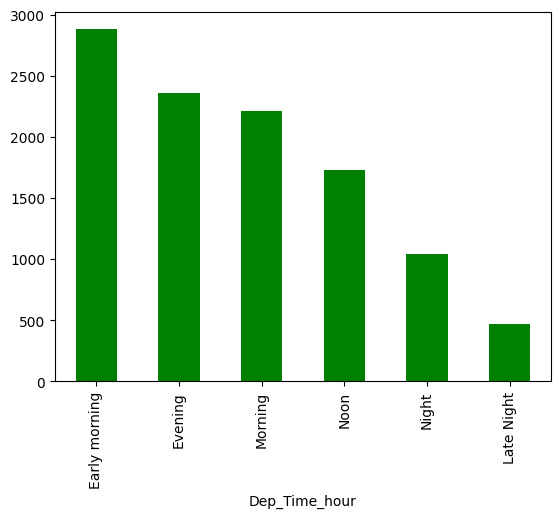

In [92]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = "bar", color = 'g')

In [93]:
!pip3 install plotly
!pip3 install chart_studio


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [94]:
!pip3 install cufflinks


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [95]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected = True)
cf.go_offline()


## Visualizing Flight Departure Time Categories with Plotly

In this step, we use **Plotly** to create an interactive bar chart that shows the distribution of flights across different departure time categories. Plotly allows us to generate interactive visualizations that can be explored further by users.


In [101]:
import plotly.express as px
counts = data['Dep_Time_hour'].apply(flight_dep_time).value_counts()
fig = px.bar(x=counts.index, y=counts.values, labels={'x': 'Departure Hour', 'y': 'Frequency'})
fig.show()


## Problem Statement: Pre-processing the Duration Feature

In this step, we focus on cleaning and pre-processing the **Duration** feature in the dataset, which represents the total flight duration. The goal is to standardize the format and convert the data into a numerical format that can be used for analysis and modeling.

### Tasks:
1. **Identify the Format**: The **Duration** feature is given in the format of hours and minutes (e.g., "2h 50m", "3h", "1h 10m").
2. **Extract Hours and Minutes**: We will extract the hours and minutes from the given format.
3. **Convert to Numeric Value**: We will convert the **Duration** into a single numeric value (in minutes) to facilitate easier analysis.
4. **Handle Missing or Inconsistent Values**: Missing or inconsistent entries will be addressed (e.g., converting invalid durations or null values).

### Pre-processing the Duration Feature

The function `preprocess_duration(x)` is designed to handle and standardize the **Duration** feature in the dataset. Here's a breakdown of how the function works:



In [102]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'

    return x

In [103]:
data['Duration'].apply(preprocess_duration)
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [106]:
data['Duration'][0]

'2h 50m'

In [107]:
'2h 50m'.split(' ')

['2h', '50m']

In [108]:
'2h 50m'.split(' ')[0]

'2h'

In [109]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [111]:
'2h 50m'.split(' ')[1][0:-1]

'50'

### Extracting Duration in Hours

The following code snippet extracts the hour component from the **Duration** feature and stores it in a new column called **Duration_hours**:



In [123]:
data["Duration_hours"]= data['Duration'].apply(lambda x : int(x.split(' ')[0][0: -1]))

### Extracting Duration in Minutes

The following code snippet extracts the minute component from the **Duration** feature and stores it in a new column called **Duration_minutes**:


In [122]:
data["Duration_minutes"] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0: -1]) if len(x.split(' ')
) > 1 else int(x.split(' ')[0][0: -1]))


In [124]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_minutes,Duration_minutes,Duration_hours
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,50,50,2
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,25,25,7
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,0,19,19


## Problem Statement - Analyzing the Impact of Flight Duration on Airfare

In this step, we aim to investigate whether the duration of a flight has an effect on its fare price. 

### Steps for Analysis:
1. **Data Exploration**: Visualize the relationship between **Duration** and **Fare** using scatter plots or bar charts.
3. **Regression Analysis**: Build a simple regression model to predict fare based on flight duration and evaluate its performance.

### Expected Outcome:
The analysis will help us understand whether there is any significant relationship between the duration of the flight and its fare price, which could offer insights into factors influencing pricing in the airline industry.



### Analyzing and Converting Duration to Total Minutes

In this step, we convert the `Duration` feature from its original format (e.g., "2h 30m") into a total number of minutes to make it easier for analysis. The `Duration` feature contains information about flight duration in hours and minutes, but to analyze the relationship with price or other features, we need to work with a numerical representation of time.



In [126]:
data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1')

0        2*60+50*1
1        7*60+25*1
2            19*60
3        5*60+25*1
4        4*60+45*1
           ...    
10678    2*60+30*1
10679    2*60+35*1
10680         3*60
10681    2*60+40*1
10682    8*60+20*1
Name: Duration, Length: 10682, dtype: object

In [132]:
data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [133]:
data['Duration_total_minutes'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [128]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_in_minutes',
       'Duration_minutes', 'Duration_hours'],
      dtype='object')

## Scatter Plot: Analyzing the Relationship Between Duration and Price

In this step, we create a scatter plot to analyze whether there is a relationship between the total flight duration (in minutes) and the flight price. A scatter plot helps visualize the correlation between two numerical variables, which in this case are `Duration_total_minutes` and `Price`.



<Axes: xlabel='Duration_total_minutes', ylabel='Price'>

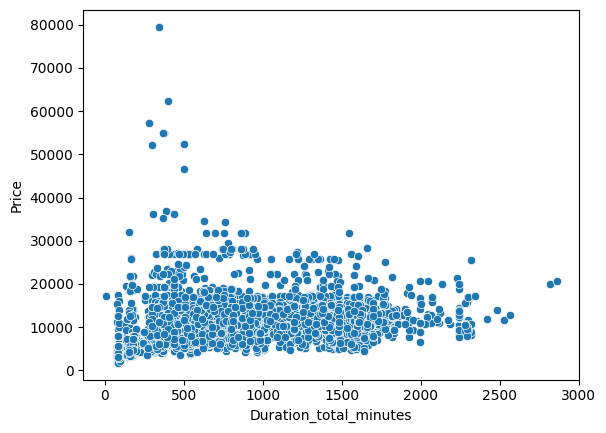

In [134]:
sns.scatterplot(x = "Duration_total_minutes", y = "Price", data=data)

### Scatter Plot of Flight Data: Duration vs. Price

The following code snippet generates a scatter plot using `seaborn` to visualize the relationship between the flight duration and the price of flights:


<Axes: xlabel='Duration_total_minutes', ylabel='Price'>

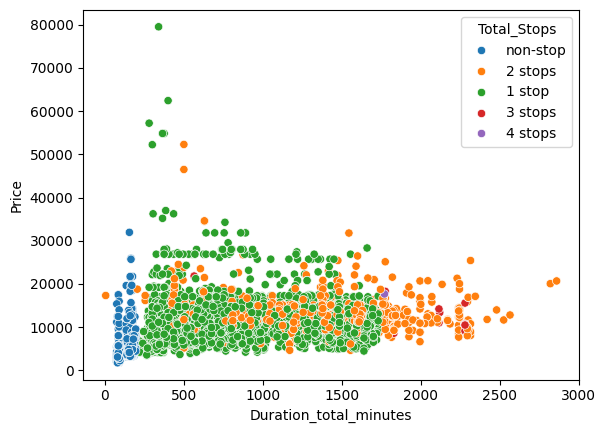

In [136]:
sns.scatterplot(x = "Duration_total_minutes", y = "Price", hue ="Total_Stops", data=data)

### Observations from the Scatter Plot: Duration vs. Price

From the scatter plot above, we can observe the following trends:

- **Non-stop Flights:** These flights tend to have a shorter duration and are priced lower compared to flights with stops. This suggests that passengers are often willing to pay less for a quicker, more direct travel experience.
  
- **Flights with Stops:** As the number of stops increases, both the flight duration and the price tend to rise. Flights with more stops typically take longer and may also be priced higher due to the added complexity and longer travel times.

These trends highlight how flight pricing and duration are influenced by the number of stops, with non-stop flights being faster and often more affordable, while flights with multiple stops are longer and may come with higher prices due to their extended travel times and additional logistical considerations.


### Observations from the Regression Line: Duration vs. Price

In the graph below, we can observe that the regression line indicates a **positive correlation** between flight duration and price:

- **Duration Increases with Price:** As the duration of the flight increases, the price tends to rise as well. This suggests that longer flights, potentially with more stops or longer travel distances, are priced higher. The regression line shows a general upward trend, supporting the idea that flights with longer durations often come with higher fares.

This relationship is consistent with the notion that longer flights may involve more operational costs, such as fuel, staffing, and logistics, which are often passed on to passengers in the form of higher ticket prices.


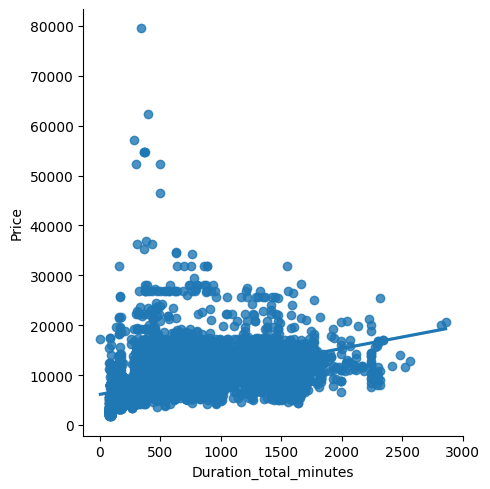

In [137]:
sns.lmplot(x = "Duration_total_minutes", y = "Price", data=data)

## Bi-Variate Analysis

### Problem Statement 1: On Which Routes is Jet Airways Used the Most?

To analyze the most popular routes for Jet Airways, we can perform a bi-variate analysis using the **Airline** and **Route** columns in the dataset. The goal is to identify which routes are most frequently flown by Jet Airways.


In [138]:
data[data['Airline'] == "Jet Airways"]

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_minutes,Duration_minutes,Duration_hours,Duration_total_minutes
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,0,19,19,1140
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,30,30,15,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5,5,5,21,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25,30,30,25,1530
13,Jet Airways,2019-05-09,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,9,5,2019,21,10,9,20,10,10,12,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-05-09,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,9,5,2019,11,40,19,0,20,20,7,440
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,55,55,19,1195
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,15h,2 stops,No info,16704,27,5,2019,13,25,4,25,0,15,15,900
10674,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,12,3,2019,20,35,21,20,45,45,24,1485


### Top Routes for Jet Airways

The table below shows the top routes where **Jet Airways** is used the most. By analyzing the data, we can identify which flight routes are most frequently operated by Jet Airways. These routes are determined by counting the occurrences of each destination pair in the dataset that are assigned to Jet Airways.

From this analysis, we can observe which destinations are most popular for this airline, indicating key markets where Jet Airways has a strong presence. This information can be valuable for understanding passenger preferences, demand patterns, and Jet Airways' operational focus in terms of route offerings.

In [141]:
data[data['Airline'] == "Jet Airways"].groupby('Route').size().sort_values(ascending =False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

### Problem Statement 2: Airlines vs. Price Analysis

The second problem involves analyzing the relationship between different **airlines** and the **price** of flights. The goal is to identify whether certain airlines tend to have higher or lower fares, and how the pricing varies across different airlines.

For this, we can create a box plot where the x-axis represents the different airlines, and the y-axis shows the corresponding flight prices. This would give us an understanding of the price distribution for each airline, highlighting which airlines have higher average prices and which are more budget-friendly.

By analyzing the variation in flight prices for different airlines, we can uncover trends related to airline pricing strategies, market positioning, and competition in the aviation industry.

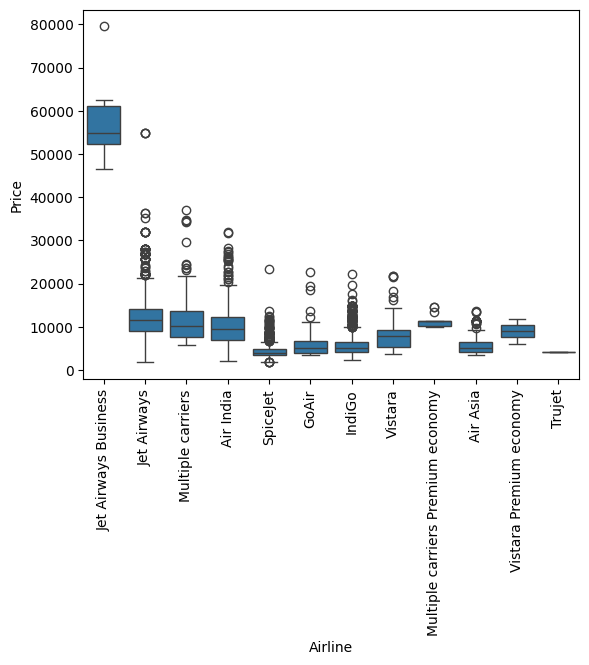

In [145]:
sns.boxplot(y = "Price", x = "Airline", data= data.sort_values('Price', ascending = False))
plt.xticks(rotation = "vertical")
plt.show()

## **Feature Encoding**


## Applying One-hot encoding on data

### 1. **Identifying Categorical and Numerical Columns**
   The first step in the process is to separate the dataset into **categorical** and **numerical** columns. This is done by checking the data type of each column:
   - **Categorical columns** are those that contain non-numeric data, such as text or labels (e.g., Source, Airline).
   - **Numerical columns** contain data that can be represented by numbers (e.g., Price, Duration).
   This separation helps determine which columns need encoding and which can remain unchanged.

In [152]:
cat_col = [col for col in data.columns if data[col].dtype == 'Object']

In [153]:
num_col = [col for col in data.columns if data[col].dtype != 'Object']

### 2. **Inspecting Unique Values in the Source Column**
   The code then inspects the Source column to check for all unique values (e.g., Banglore, Delhi). This step is essential for understanding the different categories in the column that will be encoded. It helps identify the possible values that will be transformed into new binary columns during the one-hot encoding process.

In [154]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

### 3. **Basic Encoding of the Source Column**
   The code applies a basic transformation to the Source column by assigning a 1 to rows where the source is "Banglore", and a 0 to all other sources. This is a simple form of encoding where we represent the presence of "Banglore" with 1 and the absence of it with 0. While this is useful for distinguishing Banglore from other values, it does not handle multiple categories in the Source column.

In [155]:
data['Source'].apply(lambda x : 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

### 4. **One-Hot Encoding for All Unique Categories**
   The most important step is applying **one-hot encoding** to the Source column. For each unique value in the Source column (e.g., Banglore, Delhi, Mumbai), a new binary column is created:
   - A new column is added for each unique source, such as Source_Banglore, Source_Delhi, and Source_Mumbai.
   - In these new columns, a 1 is assigned if the row's Source matches the corresponding category (e.g., if the source is Banglore, the Source_Banglore column gets a 1).
   - A 0 is assigned in all other cases.
   This process effectively converts the categorical Source column into multiple binary columns, where each column indicates whether a specific source is present for each row.

### Conclusion
   By performing these steps, we transform the categorical Source column into multiple binary columns, making the data suitable for machine learning algorithms that require numerical input. This process ensures that each category in the Source column is represented separately and independently, which is key for proper model training and analysis.

In [157]:
for sub_category in data['Source'].unique():
    data['Source_' + sub_category] = data['Source'].apply(lambda x: 1 if x == sub_category else 0)
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_minute,Duration_in_minutes,Duration_minutes,Duration_hours,Duration_total_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,10,50,50,2,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,15,25,25,7,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,...,25,0,19,19,1140,0,0,1,0,0


## Applying target guided encoding on data